# Image recognition from pre-trained models

In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
"""
 Research - Image recognition from VGG16, VGG19, ResNet50, Inception v3, Xception and CRNN for music tagging models
 
 https://github.com/fchollet/deep-learning-models
 
"""

__version__    = "0.1"
__author__     = "Martin Pocquet"
__date__       = "April 04th, 2017"
__status__     = "Prototype"  # Development, Production


In [37]:
# Base packages :)
import pandas as pd
import numpy as np
from pylab import * 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import time


In [9]:
# import the necessary packages
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
import argparse
import cv2


In [40]:
# Working directory

import os
wdir = 'C:\\Users\\Pocquet Martin\\Desktop\\MPT\\image_reco'

os.chdir(wdir)
print("Working directory " + wdir + ".")

Working directory C:\Users\Pocquet Martin\Desktop\MPT\image_reco.


In [32]:
# Model dictionnary
MODELS = {"vgg16": VGG16,
          "vgg19": VGG19,
          "inception": InceptionV3,
          "xception": Xception, # TensorFlow ONLY
          "resnet": ResNet50
         }


In [55]:
# construct the argument 

################
## PARAMETERS ##
################

_image_  = 'test_0.jpg'
_model_  = 'resnet'
_nlabel_ = 10

################
################

print 'Path to image              :', _image_
print 'Number of predicted labels :',_nlabel_

# ensure model is ok
if _model_ not in MODELS.keys():
    _model_ = 'vgg16'
    print 'Incorrect model - VGG16 used instead'
else:
    print 'Model used                 :', _model_
    

Path to image              : test_0.jpg
Number of predicted labels : 10
Model used                 : resnet


In [35]:
# initialize the input image shape (224x224 pixels) 
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input
 
# if we are using the InceptionV3 or Xception networks, then we
# need to set the input shape to (299x299) [rather than (224x224)]
# and use a different image processing function
if _model_ in ("inception", "xception"):
    inputShape = (299, 299)
    preprocess = preprocess_input
    
print 'Input shape :', inputShape

Input shape : (224, 224)


In [38]:
# Load - cette operation peut prendre beaucoup de temps (de 90 à 1000MB à charger...) 
# VGG16, VGG19        : entre 500 et 1000 MB
# ResNet              : 100 MB
# Inception, Xception : entre 90 et 100 MB

t_i = time.time()
print("[INFO] Loading {}...".format(_model_))
#Network = MODELS[_model_]
#model = Network(weights="imagenet")
print '[INFO] Model loaded in', time.time()-t_i, 'sec'

[INFO] Loading vgg16...
[INFO] Model loaded in 0.0 sec


[INFO] loading and pre-processing image...


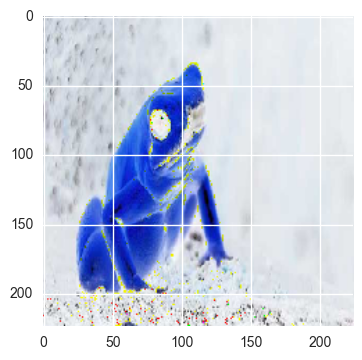

In [47]:
# Image preprocess
_print_ = 1


print("[INFO] loading and pre-processing image...")
image = load_img(_image_, target_size=inputShape)
image = img_to_array(image)

if _print_ == 1:
    imshow(image)
    
# expand dimension to feed network
image = np.expand_dims(image, axis=0)
 
# pre-process 
image = preprocess(image)


In [56]:
# classify the image

print("[INFO] classifying image with '{}'...".format(_model_))
preds = model.predict(image)
P = imagenet_utils.decode_predictions(preds, top=_nlabel_)

# loop over the predictions and display the top N predictions and probabilities
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

[INFO] classifying image with 'resnet'...


NameError: name 'model' is not defined

# Adapt to local images -> Transfer learning

In [57]:
# cf github

In [5]:
import pandas as pd
test = pd.read_json('C:\\Users\\Pocquet Martin\\Desktop\\part-000000000000.json\\part-000000000000.json')

ValueError: Could not reserve memory block

In [7]:
import json
with open('C:\\Users\\Pocquet Martin\\Desktop\\part-000000000000.json\\part-000000000000.json') as f:
    for line in f:
        j_content = json.loads(line)

In [22]:
pd.DataFrame(j_content).to_excel('C:\\Users\\Pocquet Martin\\Desktop\\sample_mail_advert.xlsx')

In [20]:
pd.DataFrame(j_content)['user_agent'].iloc[0]

u'Mozilla/5.0 (Linux; Android 6.0.1; SM-G935F Build/MMB29K; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/56.0.2924.87 Mobile Safari/537.36 [FBIA/FB4A;FBAV/117.0.0.18.47;]'